# Simple Machine Learning for Style classification

### ...using Scikit-Learn (RFC, SVMs & Neural Networks)

Import Packages :

In [1]:
# loading files
import pickle
import pandas as pd
import seaborn as sns
# numpy
import numpy as np
# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# some libraries for result evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
# rendering values to input data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# My modules
from NetworkX_GraphTranslation import CentralityPoint2D as cepo
from NetworkX_GraphTranslation import getKeyByValue
from AutoHarmonicAnalysis import GraphOfNewPiece
from GraphTrajectoryClass import *

We create a dictionary with all the file Names, it's going to be implementated in a file later on (Note all the styles already categorized are below)

In [2]:
nameDict = {
    'bach' : 'BachChoralesGraphObjects',
    'mozart' : 'MozartGraphObjectsCorpus',
    'palestrina' : 'PalestrinaGraphObjectsCorpus',
    'monteverdi' : 'MonteverdiGraphObjectsCorpus', 
    'jazz' : 'JazzGraphObjectsDirectory',
    'beethonven' :'BeethovenGraphObjectsCorpus',
    'schumann' : 'SchumannGraphObjectsDirectory',
    'chopin' : 'ChopinGraphObjectsDirectory'
}

Load function and Create Dictionaries

In [3]:
def loadDict(file_name) :
    complete_name = 'Comparison_Results/GraphDictionaries_TrajectoryV1/' + file_name + '.dictionary'
    graphDict = pickle.load( open( complete_name, "rb" ) )
    return graphDict

In [4]:
def composerPointsDict(method) :
    scikit_datalist = 'scikit_datalist'
    dictOfComposerPoints_mix4 = dict()
    for composer, file_name in nameDict.items() :
        datalist = []
        for graph in loadDict(file_name).values() :
            x, y, z = cepo(graph, 3, method)
            datalist.append([[composer],[x, y, z]])
    datalist = np.array(datalist)
    pickle.dump( dictOfComposerPoints_mix4, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

### Store all data to an object

In [7]:
def composerClassGraphs() :
    scikit_datalist = 'scikit_datalist'
    datalist = []
    for composer, file_name in nameDict.items() :
        for graph in loadDict(file_name).values() :
            graphcls = GraphClass(graph)
            datalist.append([composer, graphcls])
    datalist = np.array(datalist)
    pickle.dump( datalist, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

In [9]:
graphdataObjects = composerClassGraphs()

AttributeError: 'list' object has no attribute 'is_directed'

{'bach': [[0.2411351392919529, 12.654761904761898, 0.4164874551971326],
  [0.26245598416134297, 12.266666666666667, 0.34098961685278817],
  [0.24099487199631361, 14.039682539682536, 0.5411764705882354],
  [0.274546598689906, 11.376190476190477, 0.5237154150197628],
  [0.18913421862998564, 14.501525680202148, 0.5102040816326531],
  [0.2240697144589225, 10.71071428571428, 0.5441595441595442],
  [0.19580839102414774, 15.055952380952377, 0.5113821138211383],
  [0.18811197068569924, 16.532539682539678, 0.5135746606334842],
  [0.21061520780373139, 13.90912698412698, 0.5135135135135135],
  [0.30983617263584495, 9.583333333333336, 0.36152777777777784],
  [0.24397065487920333, 14.292857142857143, 0.3281808664306491],
  [0.2443085007652558, 13.100000000000001, 0.4130175867017972],
  [0.16574092675768468, 18.911074464750936, 0.48695652173913045],
  [0.26357138011538106, 9.816666666666665, 0.4121356909907233],
  [0.2064604156578288, 14.549206349206344, 0.4024390243902439],
  [0.18947344427788854, 

In [44]:
def composerPointsDict2List(composerPointsDict) :
    nl = [['COMPOSER', 'Kaltz Centrality', 'Global Clustering', 'Square Clustering', 'STYLE', 'HARMONY']]
    for composer, points in composerPointsDict.items() :
        print([composer, len(points)])
        if composer == 'bach' or composer == 'monteverdi' :
            style = 'barok'
            harmony = 'modal'
        elif composer == 'palestrina' :
            style = 'medieval'
            harmony = 'modal'
        elif composer == 'jazz' :
            style = 'jazz'
            harmony = 'chromatic'
        elif composer == 'chopin' :
            style = 'classical'
            harmony = 'chomatic'
        else :
            style = 'classical'
            harmony = 'classic'
            
        if composer == 'palestrina' :
            for index, point in enumerate(points) :
                if index < 60 :
                    x, y, z = point
                    nl.append([composer, x, y, z])
#                     nl.append([composer, x, y, z, style, harmony])
        else : 
            for point in points :
                x, y, z = point
                nl.append([composer, x, y, z])
#                 nl.append([composer, x, y, z, style, harmony])
    return np.array(nl)

In [45]:
dataArray = composerPointsDict2List(loadDict('dictOfComposerPoints_mix4'))

['bach', 197]
['mozart', 16]
['palestrina', 1259]
['monteverdi', 78]
['jazz', 64]
['beethonven', 26]
['schumann', 36]
['chopin', 6]


In [46]:
import csv

with open('Comparison_Results/GraphDictionaries_TrajectoryV1/scikit_datalist.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(dataArray)
csvFile.close()

### Read Files

In [47]:
data = pd.read_csv('Comparison_Results/GraphDictionaries_TrajectoryV1/scikit_datalist.csv', sep = ',')

In [48]:
data.head()

,COMPOSER,Kaltz Centrality,Global Clustering,Square Clustering,STYLE,HARMONY
0,bach,0.241135,0.386458,0.528408,NaN,NaN
1,bach,0.262456,0.521333,1.042262,NaN,NaN
2,bach,0.240995,0.302778,0.646209,NaN,NaN
3,bach,0.274547,0.511111,0.672357,NaN,NaN
4,bach,0.189134,0.497333,0.576247,NaN,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 6 columns):
COMPOSER             483 non-null object
Kaltz Centrality     483 non-null float64
Global Clustering    483 non-null float64
Square Clustering    483 non-null float64
STYLE                0 non-null float64
HARMONY              0 non-null float64
dtypes: float64(5), object(1)
memory usage: 20.8+ KB


In [50]:
data.isnull().sum()

COMPOSER               0
Kaltz Centrality       0
Global Clustering      0
Square Clustering      0
STYLE                483
HARMONY              483
dtype: int64

In [51]:
label_quality = LabelEncoder()

In [52]:
data['COMPOSER'] =  label_quality.fit_transform(data['COMPOSER'])

In [53]:
data['STYLE'] = label_quality.fit_transform(data['STYLE'])

In [54]:
data['HARMONY'] = label_quality.fit_transform(data['HARMONY'])

In [55]:
data.head()

,COMPOSER,Kaltz Centrality,Global Clustering,Square Clustering,STYLE,HARMONY
0,0,0.241135,0.386458,0.528408,0,0
1,0,0.262456,0.521333,1.042262,328,328
2,0,0.240995,0.302778,0.646209,327,327
3,0,0.274547,0.511111,0.672357,326,326
4,0,0.189134,0.497333,0.576247,325,325


In [56]:
data['COMPOSER'].value_counts()

0    197
4     78
3     64
6     60
7     36
1     26
5     16
2      6
Name: COMPOSER, dtype: int64

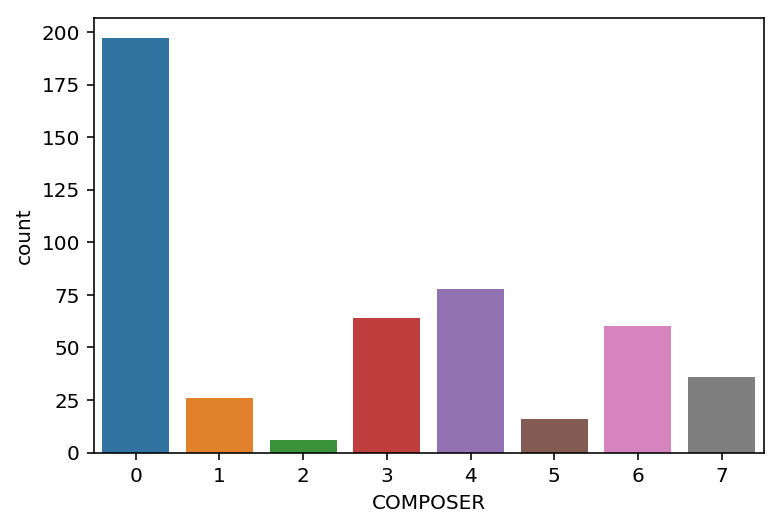

In [57]:
sns.countplot(data['COMPOSER'])

Now lets separate the dataset as response variable and feature variables

In [58]:
X = data.drop('COMPOSER', axis = 1)
y = data['COMPOSER']

Train and TEst Splitting of Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Applying standard Scalling

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Random Forest Classifier

In [61]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

Performance report :

In [62]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00         1
           3       0.92      0.75      0.83        16
           4       0.96      1.00      0.98        22
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00        17
           7       0.60      0.75      0.67         8

   micro avg       0.93      0.93      0.93       121
   macro avg       0.79      0.79      0.79       121
weighted avg       0.94      0.93      0.93       121

[[47  0  0  0  0  0  0  0]
 [ 0  6  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0 12  1  0  0  3]
 [ 0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  1  1  0  0  0  0  6]]


## SVM Classifier

In [63]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [64]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.50      0.29      0.36         7
           2       0.00      0.00      0.00         1
           3       0.47      0.50      0.48        16
           4       0.84      0.95      0.89        22
           5       1.00      0.67      0.80         3
           6       0.88      0.41      0.56        17
           7       0.20      0.12      0.15         8

   micro avg       0.73      0.73      0.73       121
   macro avg       0.58      0.49      0.52       121
weighted avg       0.71      0.73      0.70       121

[[47  0  0  0  0  0  0  0]
 [ 0  2  0  5  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 3  1  0  8  1  0  0  3]
 [ 0  0  0  0 21  0  0  1]
 [ 1  0  0  0  0  2  0  0]
 [ 8  0  0  0  2  0  7  0]
 [ 1  1  0  3  1  0  1  1]]


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Neural Network Classifier

In [65]:
mlpc = MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [66]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        47
           1       0.56      0.71      0.63         7
           2       0.00      0.00      0.00         1
           3       0.64      0.44      0.52        16
           4       0.82      0.82      0.82        22
           5       1.00      0.67      0.80         3
           6       0.56      0.29      0.38        17
           7       0.44      0.50      0.47         8

   micro avg       0.73      0.73      0.73       121
   macro avg       0.60      0.55      0.56       121
weighted avg       0.71      0.73      0.70       121

[[47  0  0  0  0  0  0  0]
 [ 0  5  0  1  0  0  0  1]
 [ 0  1  0  0  0  0  0  0]
 [ 3  1  0  7  1  0  0  4]
 [ 0  0  0  1 18  0  3  0]
 [ 1  0  0  0  0  2  0  0]
 [ 8  0  0  1  3  0  5  0]
 [ 0  2  0  1  0  0  1  4]]


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
